# Note: the image folder "Bruned images" was re-named to "burn_images"

# Importing Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image 
from sklearn import neighbors
from sklearn import metrics

# New import

# For finding image files
import glob

# 1. Create a list with the names called image_files

In [2]:
# Old solution

# images = ['nimg1.jpeg','nimg2.jpeg','nimg3.jpeg','nimg4.jpeg','nimg5.jpeg','nimg6.jpeg','img1.jpg','img2.jpg','img3.jpg','img4.jpg','img5.jpg','img6.jpg','img7.jpg','img8.jpg','img9.jpg','img10.jpg',
#          'img11.jpg','img12.jpg','img13.jpg','img14.jpg','img15.jpg','img16.jpg','img17.jpg','img18.jpg','img19.jpg','img20.jpg',
#          'img21.jpg','img22.jpg','img23.jpg','img24.jpg','img25.jpg','img26.jpg','img27.jpg','img28.jpg','img29.jpg','img30.jpg',
#          'img31.jpg','img32.jpg','img33.jpg','img34.jpg','img35.jpg','img36.jpg','img37.jpg','img38.jpg','img39.jpg','img40.jpg',
#          'img41.jpg','img42.jpg','img43.jpg','img44.jpg','img45.jpg','img46.jpg','img47.jpg','img48.jpg','img49.jpg','img50.jpg',
#          'img51.jpg','img52.jpg','img53.jpg','img54.jpg','img55.jpg','img56.jpg','img57.jpg','img58.jpg','img59.jpg','img60.jpg',
#          ]

# New solution

# Glob for all JPEGs.
images = glob.glob('./burn_images/Training_data/*')

In [3]:
normal_skin = []
burn_skin = []

# 2. Creating the scatter plot

In [4]:
for image in images:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    avgRed = RGBtuple[0]
    avgGreen = RGBtuple[1]
    avgBlue = RGBtuple[2]
    perc_green = avgGreen/(avgGreen+avgBlue+avgRed)
    perc_blue = avgBlue/(avgGreen+avgBlue+avgRed)
    normal_skin.append(perc_green)
    burn_skin.append(perc_blue)

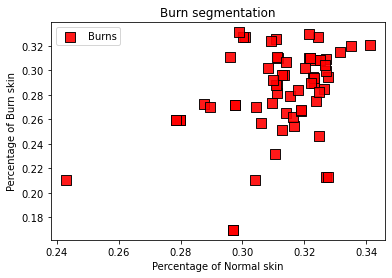

In [5]:
plt.scatter(normal_skin,burn_skin,s=100,facecolors='red',edgecolor='black',alpha=0.9,marker='s')

plt.xlabel('Percentage of Normal skin')
plt.ylabel('Percentage of Burn skin')
plt.title('Burn segmentation')
plt.legend(['Burns'])
plt.show()

# 3. Now create an array of strings called training_target with the category of each.

In [6]:
# Old solution

# training_target = ['normal','normal','normal','normal','normal','normal',
#                   'burn','burn','burn','burn','burn','burn','burn','burn','burn','burn',
#                   'burn','burn','burn','burn','burn','burn','burn','burn','burn','burn',
#                   'burn','burn','burn','burn','burn','burn','burn','burn','burn','burn',
#                   'burn','burn','burn','burn','burn','burn','burn','burn','burn','burn',
#                   'burn','burn','burn','burn','burn','burn','burn','burn','burn','burn',
#                   'burn','burn','burn','burn','burn','burn','burn','burn','burn','burn']

# New Solution

# All of the images are burn images, except a few.
# So, put some logic in for those.

# Define a variable to hold the labels.
training_target = []

# Go over each image.
for i in images:
    if i in ['./burn_images/Training_data/nimg1.jpeg', './burn_images/Training_data/nimg2.jpeg', './burn_images/Training_data/nimg3.jpeg', './burn_images/Training_data/nimg4.jpeg', './burn_images/Training_data/nimg5.jpeg', './burn_images/Training_data/nimg6.jpeg']:
        training_target.append('normal')
    else:
        training_target.append('burn')

# 4. Create an empty array of zeros called training_data that will eventually store the percent green and percent blue values.

In [7]:
training_data = np.zeros((66,2))
#training_data

# 5. Now fill the training_data array with the proper values for each image


In [8]:
for i in range(66):
    training_data[i,0] = normal_skin[i]
    training_data[i,1] = burn_skin[i]
# print(training_data)

# 6. Create your classifier.

In [9]:
from sklearn import neighbors
k1 = neighbors.KNeighborsClassifier(n_neighbors=1,weights='distance')
k1.fit(training_data, training_target)

KNeighborsClassifier(n_neighbors=1, weights='distance')

# 7. Train your classifier

In [10]:
# Old solution

# test = ['nimg7.jpeg','nimg8.jpeg','img61.jpg','img62.jpg','img63.jpg','img64.jpg','img65.jpg','img66.jpg','img67.jpg','img68.jpg','img69.jpg','img70.jpg',
#                 'img71.jpg','img72.jpg','img73.jpg','img74.jpg','img75.jpg','img76.jpg','img77.jpg','img78.jpg','img79.jpg','img80.jpg',
#                ]

# New solution

# Glob for all JPEGs.
test = glob.glob('./burn_images/Testing_data/*')

In [11]:
test_normal=[]
test_burn=[]

In [12]:
for image in test:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    percentage_green = averageGreen/(averageGreen+averageBlue+averageRed)
    percentage_blue = averageBlue/(averageGreen+averageBlue+averageRed)
    test_normal.append(percentage_green)
    test_burn.append(percentage_blue)

# 8. Creating an empty test_data array and fill it with the proper values for each test image

In [13]:
import numpy as np
test_data = np.zeros((22,2))
for i in range(22):
    test_data[i,0] = test_normal[i]
    test_data[i,1] = test_burn[i]
#print(test_data)

# 9.Predict the class of the test images and Print the prediction from the test images

In [14]:
k1_pred = k1.predict(test_data)
print(k1_pred)

['normal' 'burn' 'burn' 'burn' 'burn' 'burn' 'burn' 'burn' 'burn' 'burn'
 'burn' 'burn' 'burn' 'burn' 'burn' 'burn' 'burn' 'burn' 'burn' 'burn'
 'burn' 'burn']


# 10. Actual and predicted results from the model

In [16]:
# Old solution

# print("Prediction:",k1_pred)
# print()
# print("Actual: normal,normal,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn,burn")

# New solution

# Define the four outcomes.
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

# Define a truth list.
truth_list = ['normal', 'normal', 
              'burn', 'burn', 'burn', 
              'burn', 'burn', 'burn', 
              'burn', 'burn', 'burn',
              'burn', 'burn', 'burn', 
              'burn', 'burn', 'burn', 
              'burn', 'burn', 'burn', 
              'burn', 'burn']

# Go over the predictions and classify each predicted label.
for i in range(len(k1_pred)):
    
    if k1_pred[i] == 'burn' and truth_list[i] == 'burn':
        true_positive += 1
    
    if k1_pred[i] == 'burn' and truth_list[i] == 'normal':
        false_positive += 1
        
    if k1_pred[i] == 'normal' and truth_list[i] == 'normal':
        true_negative += 1
    
    if k1_pred[i] == 'normal' and truth_list[i] == 'burn':
        false_negative += 1

print(true_positive)
print(false_positive)
print(true_negative)
print(false_negative)    

20
1
1
0


One of the normal image was classified as burn image